In [1]:
import warnings
import pickle

import numpy as np
import pandas as pd

from tqdm import tqdm
from glob import glob
from scipy.spatial import distance
from scipy import stats

from sklearn import decomposition, manifold

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

%matplotlib inline

In [3]:
warnings.simplefilter('ignore')
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [4]:
embeds, rows = [], []

for path in tqdm(glob('../data/b7-embeds/*.p')):
    with open(path, 'rb') as fh:
        
        lines = pickle.load(fh)
        
        for line in lines:
            title = ' '.join(line['tokens'])
            embeds.append(line['embedding'])
            rows.append((line['label'], line['count'], title))

100%|██████████| 50/50 [00:08<00:00,  5.48it/s]


In [5]:
embeds = np.stack(embeds)

In [6]:
df = pd.DataFrame(rows, columns=('label', 'count', 'title'))

In [7]:
df.label.unique()

array(['apnews.com', 'cnn.com', 'huffingtonpost.com', 'reuters.com',
       'breitbart.com', 'nytimes.com', 'foxnews.com'], dtype=object)

In [8]:
embeds.shape

(500000, 512)

In [9]:
dfp = df[df.label.isin(['nytimes.com', 'breitbart.com'])]

In [14]:
dfp['logc'] = np.log10(dfp['count'])
dfp['rank'] = dfp['count'].rank(method='dense', pct=True)
dfp['rank10'] = round(dfp['rank'] * 10)

In [16]:
dr = decomposition.PCA(20)
embedding = dr.fit_transform(embeds[dfp.index])

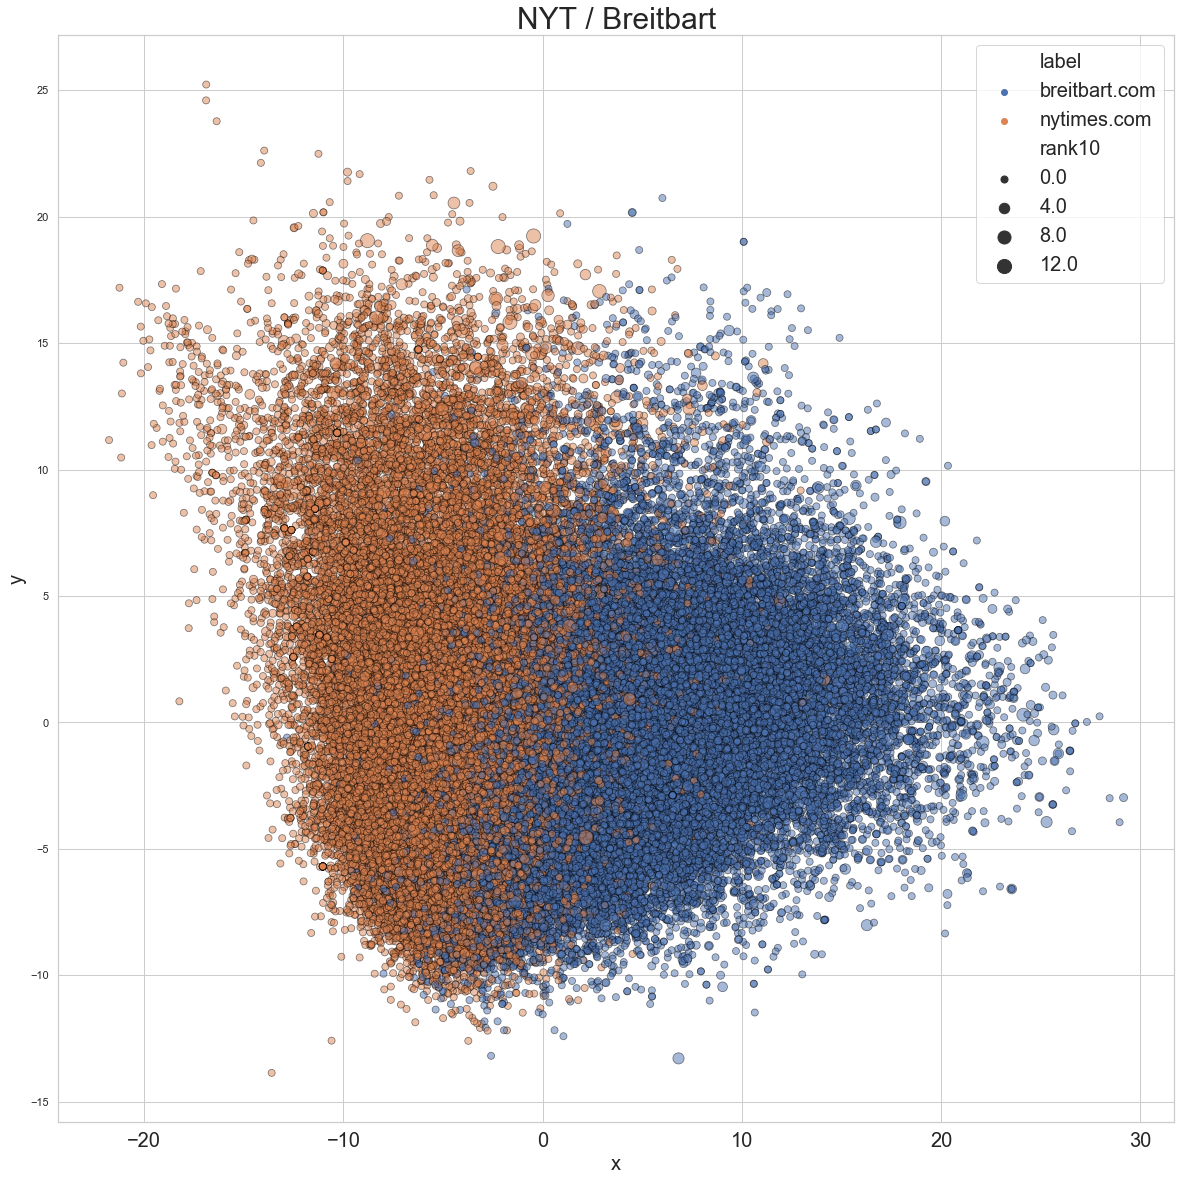

In [52]:
points = dfp.copy()
points['x'] = embedding[:,0]
points['y'] = embedding[:,1]

plt.figure(figsize=(20,20))
plt.title('NYT / Breitbart')

ax = sns.scatterplot(
    x='x', y='y',
    data=points.sample(frac=0.5),
    hue='label',
    edgecolor='black',
    size='rank10',
    sizes=(50, 200),
    alpha=0.5,
    style_order=('nytimes.com', 'breitbart.com'),
)

plt.rcParams.update({'axes.titlesize': 30})
plt.rcParams.update({'legend.fontsize': 20})
plt.rcParams.update({'xtick.labelsize': 20})
plt.rcParams.update({'ytick.labelsize': 20})

plt.legend()